In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from keras.models import Sequential,Model
from tensorflow.python.keras.preprocessing.image import load_img,ImageDataGenerator,img_to_array
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D,Activation,Dropout,BatchNormalization,Flatten,Dense
from keras.applications import VGG19,ResNet50,VGG16
from keras.optimizers import SGD, RMSprop , Adam

import numpy as np
import cv2

In [2]:
Path='/kaggle/input/kermany2018/oct2017/OCT2017/'
base_dir = os.path.join("/kaggle/input/kermany2018/oct2017/OCT2017 /")
print('Base directory --> ', os.listdir(base_dir))

Base directory -->  ['val', '.DS_Store', 'test', 'train']


In [3]:
validation_dir = os.path.join(base_dir + "val/")
print("Validation Directory --> ", os.listdir(validation_dir))


Validation Directory -->  ['DRUSEN', 'CNV', 'NORMAL', '.DS_Store', 'DME']


In [4]:
test_dir = os.path.join(base_dir + "test/")
print("Test Directory --> ", os.listdir(test_dir))

Test Directory -->  ['DRUSEN', 'CNV', 'NORMAL', '.DS_Store', 'DME']


In [5]:
train_dir = os.path.join(base_dir + "train/")
print("Train Directory --> ", os.listdir(train_dir))

Train Directory -->  ['DRUSEN', 'CNV', 'NORMAL', 'DME']


**Data Augmentation******

Data augmentation is a technique to artificially create new training data from existing training data. This is done by applying domain-specific techniques to examples from the training data that create new and different training examples.

Image data augmentation is perhaps the most well-known type of data augmentation and involves creating transformed versions of images in the training dataset that belong to the same class as the original image.

Transforms include a range of operations from the field of image manipulation, such as shifts, flips, zooms, and much more.

In [6]:
def image_show(x):
    for i in range(3):
        # define subplot
        plt.subplot(330 + 1 + i)
        # generate batch of images
        batch = x.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        plt.imshow(image)
        # show the figure
    plt.show()

In [7]:
# Shear Image : Shear tool is used to shift one part of an image, 
#a layer, a selection or a path to a direction and the other part to the opposite direction.
train_datagen_shear = ImageDataGenerator(
    shear_range=0.8,
    )

#Zoom
train_datagen_zoom = ImageDataGenerator(
    zoom_range=0.5,
    horizontal_flip=True)

#Flipping the Image 
train_datagen_flip = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True)





In [8]:
image=load_img('../input/kermany2018/OCT2017 /test/CNV/CNV-1016042-1.jpeg')
f=img_to_array(image)
sample=np.expand_dims(f,axis=0)
print('Image size',sample.shape)


Image size (1, 496, 512, 3)


Shear image


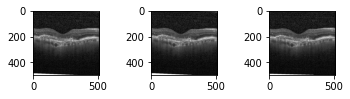

In [9]:
print("Shear image")
train_generator_shear=train_datagen_shear.flow(sample,batch_size=1)
shears=image_show(train_generator_shear)

Zoom image


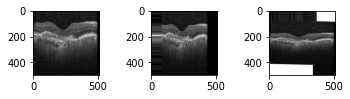

In [10]:
print("Zoom image")
train_generator_zoom=train_datagen_zoom.flow(sample,batch_size=1)
shears=image_show(train_generator_zoom)

FLIP image


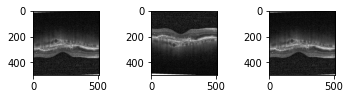

In [11]:
print("FLIP image")
train_generator_flip=train_datagen_flip.flow(sample,batch_size=1)
shears=image_show(train_generator_flip)

Hyper Parameter tune : Learning rate and batch in VGG19

In [12]:
img_height=224
img_width=224
batch_size=64

In [13]:
def create_model(lr,ep,bt):
    print('Learning Rate',lr)
    print('Number of Epochs',ep)
    print("Batch Number",bt)
    
    
    train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_height,img_width),batch_size=bt,class_mode='categorical',subset='training')

    test_generator = train_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height,img_width),
        batch_size=bt,
        class_mode='categorical')

    validation_generator = train_datagen.flow_from_directory(
        validation_dir, 
        target_size=(img_height,img_width),
        batch_size=bt,
        class_mode='categorical')
    
    
    base_model1 =  ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    model = Sequential()
    
    model.add(Flatten(input_shape=base_model1.output_shape[1:]))
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4))
    model.add(Activation('softmax'))
    
    model = Model(inputs=base_model1.input, outputs=model(base_model1.output))
    #model = Model(inputs=base_model2.input, outputs=model(base_model2.output))

    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=lr, momentum=0.9),metrics=['accuracy'])
    #model.summary()
    model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples//800,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples,
                    epochs=ep
                    )

In [14]:
#batchs=[32,64]
#epochs=[10,20,45]

learn=[0.01,0.001,0.0001]
''''
for i in range(len(batchs)):
    for j in range(len(learn)):
            BT=batchs[i]
            tune=create_model(learn[j],3,BT)
create_model(0.01,1,64)
'''







"'\nfor i in range(len(batchs)):\n    for j in range(len(learn)):\n            BT=batchs[i]\n            tune=create_model(learn[j],3,BT)\ncreate_model(0.01,1,64)\n"

****Hyper Parameter Tunning *****

***“hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm”.***

Learning rate =0.001 , Batch =64 will provide Good Result . After Running the Create Model Function.

In [15]:



##DATA AUGMENTATION
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#IMAGE FLOW FOR TRAINING 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

#IMAGE FLOW FOR TESTING 
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical')

#IMAGE FLOW FOR VALIDATION 
validation_generator = train_datagen.flow_from_directory(
    validation_dir, 
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical')




Found 83484 images belonging to 4 classes.
Found 968 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


***RESNET MODEL***

 Resnet short for Residual Networks is a classic neural network used as a backbone for many computer vision tasks. This model was the winner of ImageNet challenge in 2015. The fundamental breakthrough with ResNet was it allowed us to train extremely deep neural networks with 150+layers successfully. Prior to ResNet training very deep neural networks was difficult due to the problem of vanishing gradients.

AlexNet, the winner of ImageNet 2012 and the model that apparently kick started the focus on deep learning had only 8 convolutional layers, the VGG network had 19 and Inception or GoogleNet had 22 layers and ResNet 152 had 152 layers. In this blog we will code a ResNet-50 that is a smaller version of ResNet 152 and frequently used as a starting point for transfer learning.


In [16]:
base_model2 =  ResNet50(weights='imagenet', include_top=False, input_shape=(img_height,img_width, 3))


model = Sequential()
model.add(Flatten(input_shape=base_model2.output_shape[1:]))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(4))# Number of classes 
model.add(Activation('softmax'))



model = Model(inputs=base_model2.input, outputs=model(base_model2.output))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001, momentum=0.9),
              metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_____________________________

In [17]:
resnet50_history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples//800,
                    validation_data=validation_generator,
                    validation_steps=test_generator.samples//16,
                    epochs=20,
                    verbose=1,
                    max_queue_size=100,
                    workers = 4 ,
                    use_multiprocessing=True,
                    )

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
104/104 [==============================] - 240s 2s/step - loss: 0.9280 - accuracy: 0.7008 - val_loss: 1.6185 - val_accuracy: 0.2500
Epoch 2/20
104/104 [==============================] - 230s 2s/step - loss: 0.3172 - accuracy: 0.8883 - val_loss: 1.8327 - val_accuracy: 0.2490
Epoch 3/20
104/104 [==============================] - 232s 2s/step - loss: 0.2314 - accuracy: 0.9219 - val_loss: 1.3997 - val_accuracy: 0.2432
Epoch 4/20
104/104 [==============================] - 238s 2s/step - loss: 0.2248 - accuracy: 0.9262 - val_loss: 1.4802 - val_accuracy: 0.2677
Epoch 5/20
104/104 [==============================] - 239s 2s/step - loss: 0.2009 - accuracy: 0.9361 - val_loss: 1.6708 - val_accuracy: 0.2667
Epoch 6/20
104/104 [==============================] - 240s 2s/step - loss: 0.1893 - accuracy: 0.9352 - val_loss: 1.5655 - val_accuracy: 0.2406
Epoch 7/20
104/104 [==============================] - 243s 2s/step - loss: 0.1749 - accuracy: 0.9393 - val_loss: 1.1539 - val_accuracy: 0.5099

***PLOT OF RESNET50***

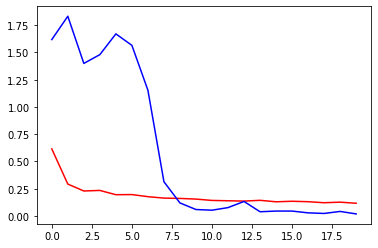

In [18]:
plt.plot(resnet50_history.history['loss'],'r')
plt.plot(resnet50_history.history['val_loss'],'b')



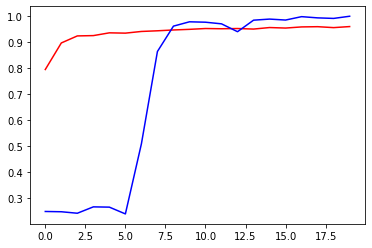

In [19]:
plt.plot(resnet50_history.history['accuracy'],'r')
plt.plot(resnet50_history.history['val_accuracy'],'b')

****Model Classification Report ****

In [20]:
model.evaluate(test_generator)

test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict(test_generator, steps = test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)
#print(predicted_classes)

16/16 [==============================] - 18s 1s/step - loss: 0.0348 - accuracy: 0.9876


In [21]:
true_classes = test_generator.classes
#print(true_classes)
class_labels = list(test_generator.class_indices.keys()) 
#print(class_labels)

In [22]:
from sklearn.metrics import classification_report

report = classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report) 

              precision    recall  f1-score   support

         CNV       0.27      0.28      0.27       242
         DME       0.26      0.26      0.26       242
      DRUSEN       0.24      0.24      0.24       242
      NORMAL       0.25      0.25      0.25       242

    accuracy                           0.26       968
   macro avg       0.25      0.26      0.26       968
weighted avg       0.25      0.26      0.26       968



    True positive (TP): Predicting positive class as positive (ok)
    False positive (FP): Predicting negative class as positive (not ok)
    False negative (FN): Predicting positive class as negative (not ok)
    True negative (TN): Predicting negative class as negative (ok)

***Precision***

Precision measures how good our model is when the prediction is positive.Precision measures how good our model is when the prediction is positive.

*****Precision = TP/(TP+FP)*****

****Recall****

Recall measures how good our model is at correctly predicting positive classes.
The focus of recall is actual positive classes. It indicates how many of the positive classes the model is able to predict correctly.

*****Recall = TP/(TP+FN)*****

***UNDERSTANDING***

We cannot try to maximize both precision and recall because there is a trade-off between them. Increasing precision decreases recall and vice versa. We can aim to maximize precision or recall depending on the task. For an email spam detection model, we try to maximize precision because we want to be correct when an email is detected as spam. We do not want to label a normal email as spam (i.e. false positive). On the other hand, for a tumor detection task, we need to maximize recall because we want to detect positive classes as much as possible.

There is another measure that combines precision and recall into a single number and that is F1 score.

Reference Link for more understanding : https://towardsdatascience.com/how-to-best-evaluate-a-classification-model-2edb12bcc587

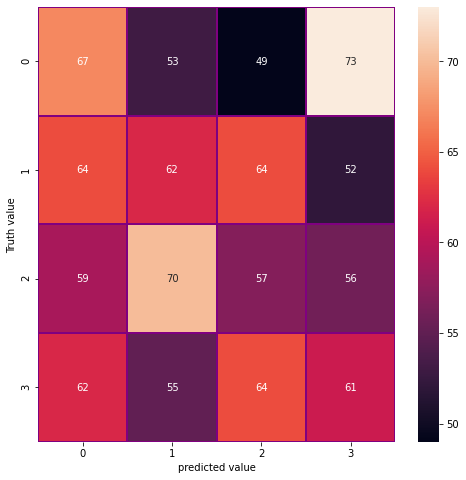

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', annot=True, linewidths=0.2, linecolor='purple')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()

***PLEASE UPVOTE THE NOTEBOOK ***


***PLEASE ALSO SHARE THOUGHTS AND SUGGESTION IN THE COMMENT SECTION ***


***STAY SAFE STAY HEALTHY ***

***JAI BHARAT***